In [24]:
import pandas as pd
import numpy as np
from helpers.mem import memory_mib
import matplotlib.pyplot as plt
from set_paths import RA, INTER

In [2]:
scoring = pd.read_pickle(INTER / "master_score.pkl")
team_splits = pd.read_pickle(INTER / "teams_team_splits_2.pkl")

In [3]:
three_years = scoring.loc[(scoring['year'] > 2000) & (scoring['year'] < 2004)]

In [4]:
three_years.shape

(3296, 11)

In [5]:
three_years.columns

Index(['firstName', 'lastName', 'pos', 'playerID', 'year', 'tmID', 'GP', 'G',
       'A', 'Pts', 'SOG'],
      dtype='object')

In [6]:
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])

In [7]:
three_years['playerID'].value_counts()

playerID
zyuzian01    3
zubruda01    3
adamscr01    3
adamske01    3
aebisda01    3
            ..
lilesjo01    1
lintnri01    1
aulinja01    1
babchan01    1
balejjo01    1
Name: count, Length: 1320, dtype: int64

In [8]:
counts = three_years['playerID'].value_counts()

In [9]:
counts.shape

(1320,)

In [10]:
index = counts.loc[counts == 3]
index

playerID
zyuzian01    3
zubruda01    3
adamscr01    3
adamske01    3
aebisda01    3
            ..
amontto01    3
allisja02    3
allenbr01    3
alfreda01    3
albelto01    3
Name: count, Length: 675, dtype: int64

In [11]:
index = counts.loc[counts == 3].sample(3).index
index

Index(['gigueje01', 'robitlu01', 'luongro01'], dtype='object', name='playerID')

In [12]:
df_3 = three_years.loc[three_years['playerID'].isin(index)]
df_3

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
8328,Jean-Sebastien,Giguere,G,gigueje01,2001,ANA,53.0,0.0,0.0,0.0,0.0
8329,Jean-Sebastien,Giguere,G,gigueje01,2002,ANA,65.0,0.0,0.0,0.0,0.0
8330,Jean-Sebastien,Giguere,G,gigueje01,2003,ANA,55.0,0.0,2.0,2.0,0.0
15157,Roberto,Luongo,G,luongro01,2001,FLO,58.0,0.0,1.0,1.0,0.0
15158,Roberto,Luongo,G,luongro01,2002,FLO,65.0,0.0,0.0,0.0,0.0
15159,Roberto,Luongo,G,luongro01,2003,FLO,72.0,0.0,3.0,3.0,0.0
21905,Luc,Robitaille,L,robitlu01,2001,DET,81.0,30.0,20.0,50.0,190.0
21906,Luc,Robitaille,L,robitlu01,2002,DET,81.0,11.0,20.0,31.0,148.0
21907,Luc,Robitaille,L,robitlu01,2003,LAK,80.0,22.0,29.0,51.0,221.0


In [13]:

basic_df_3 = df_3[['playerID', 'year', 'G']]
basic_df_3

,playerID,year,G
8328,gigueje01,2001,0.0
8329,gigueje01,2002,0.0
8330,gigueje01,2003,0.0
15157,luongro01,2001,0.0
15158,luongro01,2002,0.0
15159,luongro01,2003,0.0
21905,robitlu01,2001,30.0
21906,robitlu01,2002,11.0
21907,robitlu01,2003,22.0


In [14]:
basic_df_3.pivot(index='playerID' , columns='year', values='G' )

year,2001,2002,2003
playerID,,,
gigueje01,0.0,0.0,0.0
luongro01,0.0,0.0,0.0
robitlu01,30.0,11.0,22.0


In [15]:
pivot = basic_df_3.pivot(index='playerID' , columns='year', values='G' )

In [16]:
pivot.index

Index(['gigueje01', 'luongro01', 'robitlu01'], dtype='object', name='playerID')

In [17]:
pivot.columns

Index([2001, 2002, 2003], dtype='int64', name='year')

In [18]:
pivot.columns

Index([2001, 2002, 2003], dtype='int64', name='year')

In [19]:
pivot.index.name

'playerID'

In [20]:
pivot.columns.name

'year'

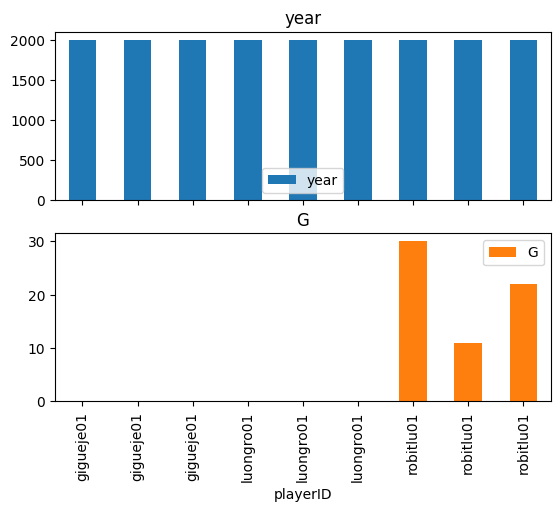

In [33]:
ax1, ax2 = basic_df_3.set_index('playerID').plot(kind='bar', subplots=True)
plt.show()

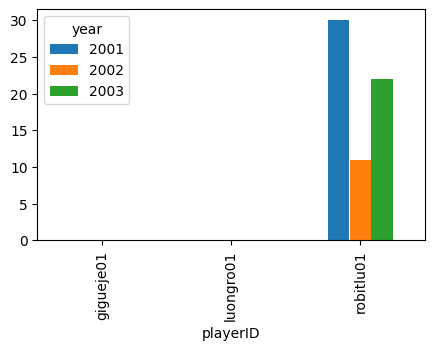

In [35]:
fig, ax = plt.subplots(figsize=(5, 3))

pivot.plot(ax=ax, kind='bar')

plt.show()

In [37]:
pivot

year,2001,2002,2003
playerID,,,
gigueje01,0.0,0.0,0.0
luongro01,0.0,0.0,0.0
robitlu01,30.0,11.0,22.0


In [36]:
pivot.melt()

,year,value
0,2001,0.0
1,2001,0.0
2,2001,30.0
3,2002,0.0
4,2002,0.0
5,2002,11.0
6,2003,0.0
7,2003,0.0
8,2003,22.0


In [39]:
pivot.reset_index(inplace=True)

In [40]:
pivot.melt(id_vars='playerID')

,playerID,year,value
0,gigueje01,2001,0.0
1,luongro01,2001,0.0
2,robitlu01,2001,30.0
3,gigueje01,2002,0.0
4,luongro01,2002,0.0
5,robitlu01,2002,11.0
6,gigueje01,2003,0.0
7,luongro01,2003,0.0
8,robitlu01,2003,22.0


In [41]:
pivot.melt(id_vars='playerID', var_name='year', value_name='G')

,playerID,year,G
0,gigueje01,2001,0.0
1,luongro01,2001,0.0
2,robitlu01,2001,30.0
3,gigueje01,2002,0.0
4,luongro01,2002,0.0
5,robitlu01,2002,11.0
6,gigueje01,2003,0.0
7,luongro01,2003,0.0
8,robitlu01,2003,22.0


In [42]:
pivot.melt(id_vars='playerID', value_vars=[2001, 2002],var_name='year', value_name='G')

,playerID,year,G
0,gigueje01,2001,0.0
1,luongro01,2001,0.0
2,robitlu01,2001,30.0
3,gigueje01,2002,0.0
4,luongro01,2002,0.0
5,robitlu01,2002,11.0


In [43]:
larger_df_3 = df_3[['playerID', 'tmID', 'year', 'G']]
larger_df_3

,playerID,tmID,year,G
8328,gigueje01,ANA,2001,0.0
8329,gigueje01,ANA,2002,0.0
8330,gigueje01,ANA,2003,0.0
15157,luongro01,FLO,2001,0.0
15158,luongro01,FLO,2002,0.0
15159,luongro01,FLO,2003,0.0
21905,robitlu01,DET,2001,30.0
21906,robitlu01,DET,2002,11.0
21907,robitlu01,LAK,2003,22.0


In [49]:
larger_df_3.columns

Index(['playerID', 'tmID', 'year', 'G'], dtype='object')

In [50]:
larger_df_3.pivot(index=['playerID', 'tmID'], columns='year', values='G')

year            2001  2002  2003
playerID  tmID                  
gigueje01 ANA    0.0   0.0   0.0
luongro01 FLO    0.0   0.0   0.0
robitlu01 DET   30.0  11.0   NaN
          LAK    NaN   NaN  22.0

In [51]:
larger_df_3 = df_3[['playerID', 'year', 'G', 'A']]
larger_df_3

,playerID,year,G,A
8328,gigueje01,2001,0.0,0.0
8329,gigueje01,2002,0.0,0.0
8330,gigueje01,2003,0.0,2.0
15157,luongro01,2001,0.0,1.0
15158,luongro01,2002,0.0,0.0
15159,luongro01,2003,0.0,3.0
21905,robitlu01,2001,30.0,20.0
21906,robitlu01,2002,11.0,20.0
21907,robitlu01,2003,22.0,29.0


In [54]:
result = larger_df_3.pivot(index=['playerID'], columns='year', values=['G', 'A'])
result

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
gigueje01   0.0   0.0   0.0   0.0   0.0   2.0
luongro01   0.0   0.0   0.0   1.0   0.0   3.0
robitlu01  30.0  11.0  22.0  20.0  20.0  29.0

In [55]:
result.columns

MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])

In [65]:
result.iloc[2, 3]

np.float64(20.0)

In [67]:
result.loc['luongro01', ('A', 2001)]

np.float64(1.0)